<a href="https://colab.research.google.com/github/palanipsb/Python-Learning/blob/main/Polynomial_Regression_Vehical_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv('/content/car data.csv')

In [92]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [53]:
df.shape

(301, 9)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [55]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [56]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [57]:
df.duplicated().sum()

2

In [60]:
df[df.duplicated(keep=False)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [58]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [93]:
df = df.drop(['Car_Name'], axis=1)

In [94]:
df.insert(0, 'Age', df['Year'].max()+1 - df['Year'])

In [95]:
df.drop(['Year'], axis=1, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

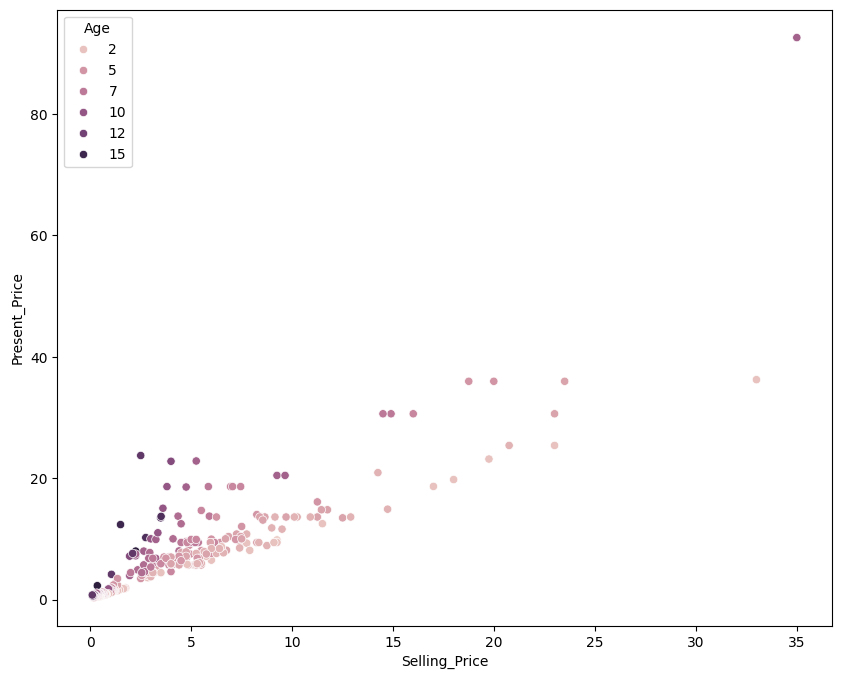

In [43]:
f,ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Selling_Price', y='Present_Price', hue='Age', data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

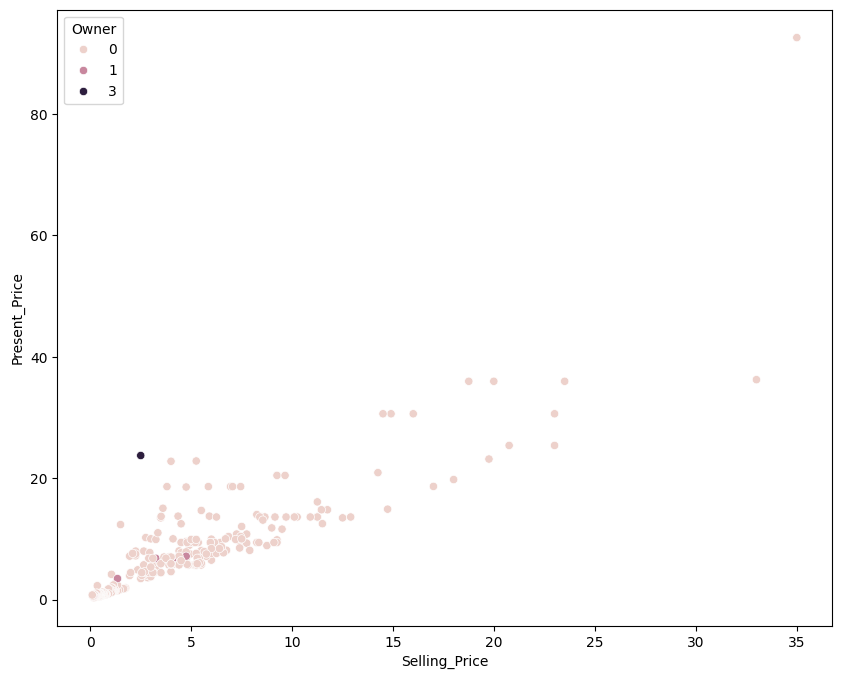

In [49]:
f,ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Selling_Price', y='Present_Price', hue='Owner', data=df)
plt.show

IndexError: index 2 is out of bounds for axis 0 with size 2

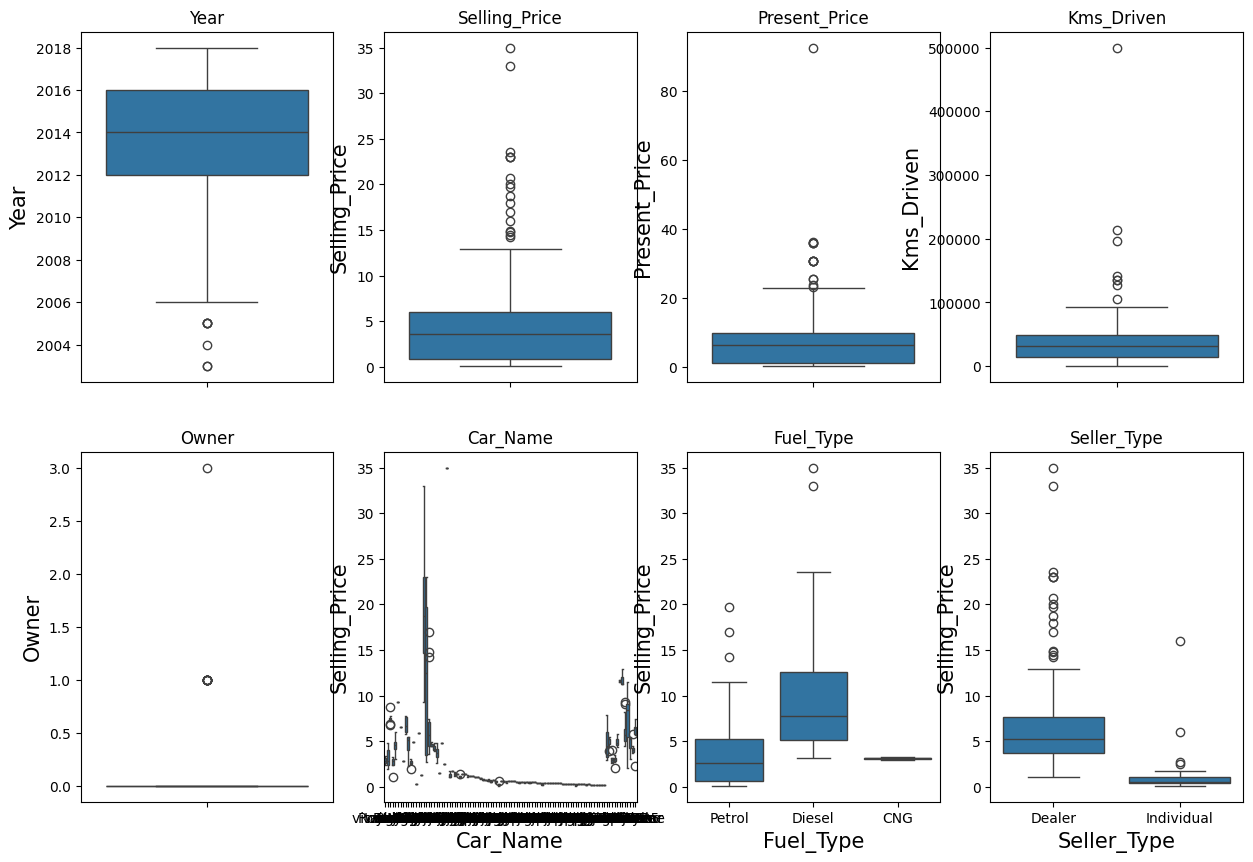

In [68]:
OrderedCols = np.concatenate([df.select_dtypes(exclude=['object']).columns.values, df.select_dtypes(include=['object']).columns.values])
f,ax = plt.subplots(2,4, figsize=(15, 10))
for i, col in enumerate(OrderedCols):
  if(i<5):
    sns.boxplot(y=col, data=df, ax=ax[i//4, i%4])
    ax[i//4, i%4].set_title(col)
    ax[i//4, i%4].yaxis.label.set_size(15)
    ax[i//4, i%4].xaxis.label.set_size(15)
  else:
    sns.boxplot(x=col, y='Selling_Price', data=df, ax=ax[i//4, i%4])
    ax[i//4, i%4].set_title(col)
    ax[i//4, i%4].yaxis.label.set_size(15)
    ax[i//4, i%4].xaxis.label.set_size(15)
plt.tight_layout()
plt.show()

In [96]:
outlier_indexes = []
target = 'Selling_Price'
for col in df.select_dtypes(exclude=['object']).columns.values:
  for cat in df[col].unique():
    df_cat = df[df[col]==cat]
    q1=df_cat[target].quantile(0.25)
    q3=df_cat[target].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    outlier_indexes.extend(df_cat[df_cat[target] > upper_limit].index)
    outlier_indexes.extend(df_cat[df_cat[target] < lower_limit].index)
    outlier_indexes=list(set(outlier_indexes))

for col in df.select_dtypes(include=['object']).columns.values:
  for cat in df[col].unique():
    df_cat = df[df[col]==cat]
    q1=df_cat[target].quantile(0.25)
    q3=df_cat[target].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    outlier_indexes.extend(df_cat[df_cat[target] > upper_limit].index)
    outlier_indexes.extend(df_cat[df_cat[target] < lower_limit].index)
    outlier_indexes=list(set(outlier_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outlier_indexes), outlier_indexes))


34 outliers were identified, whose indices are:

[129, 258, 144, 274, 148, 153, 27, 169, 177, 50, 51, 52, 53, 54, 59, 62, 63, 64, 66, 69, 200, 79, 80, 82, 85, 86, 90, 93, 94, 96, 97, 104, 233, 248]


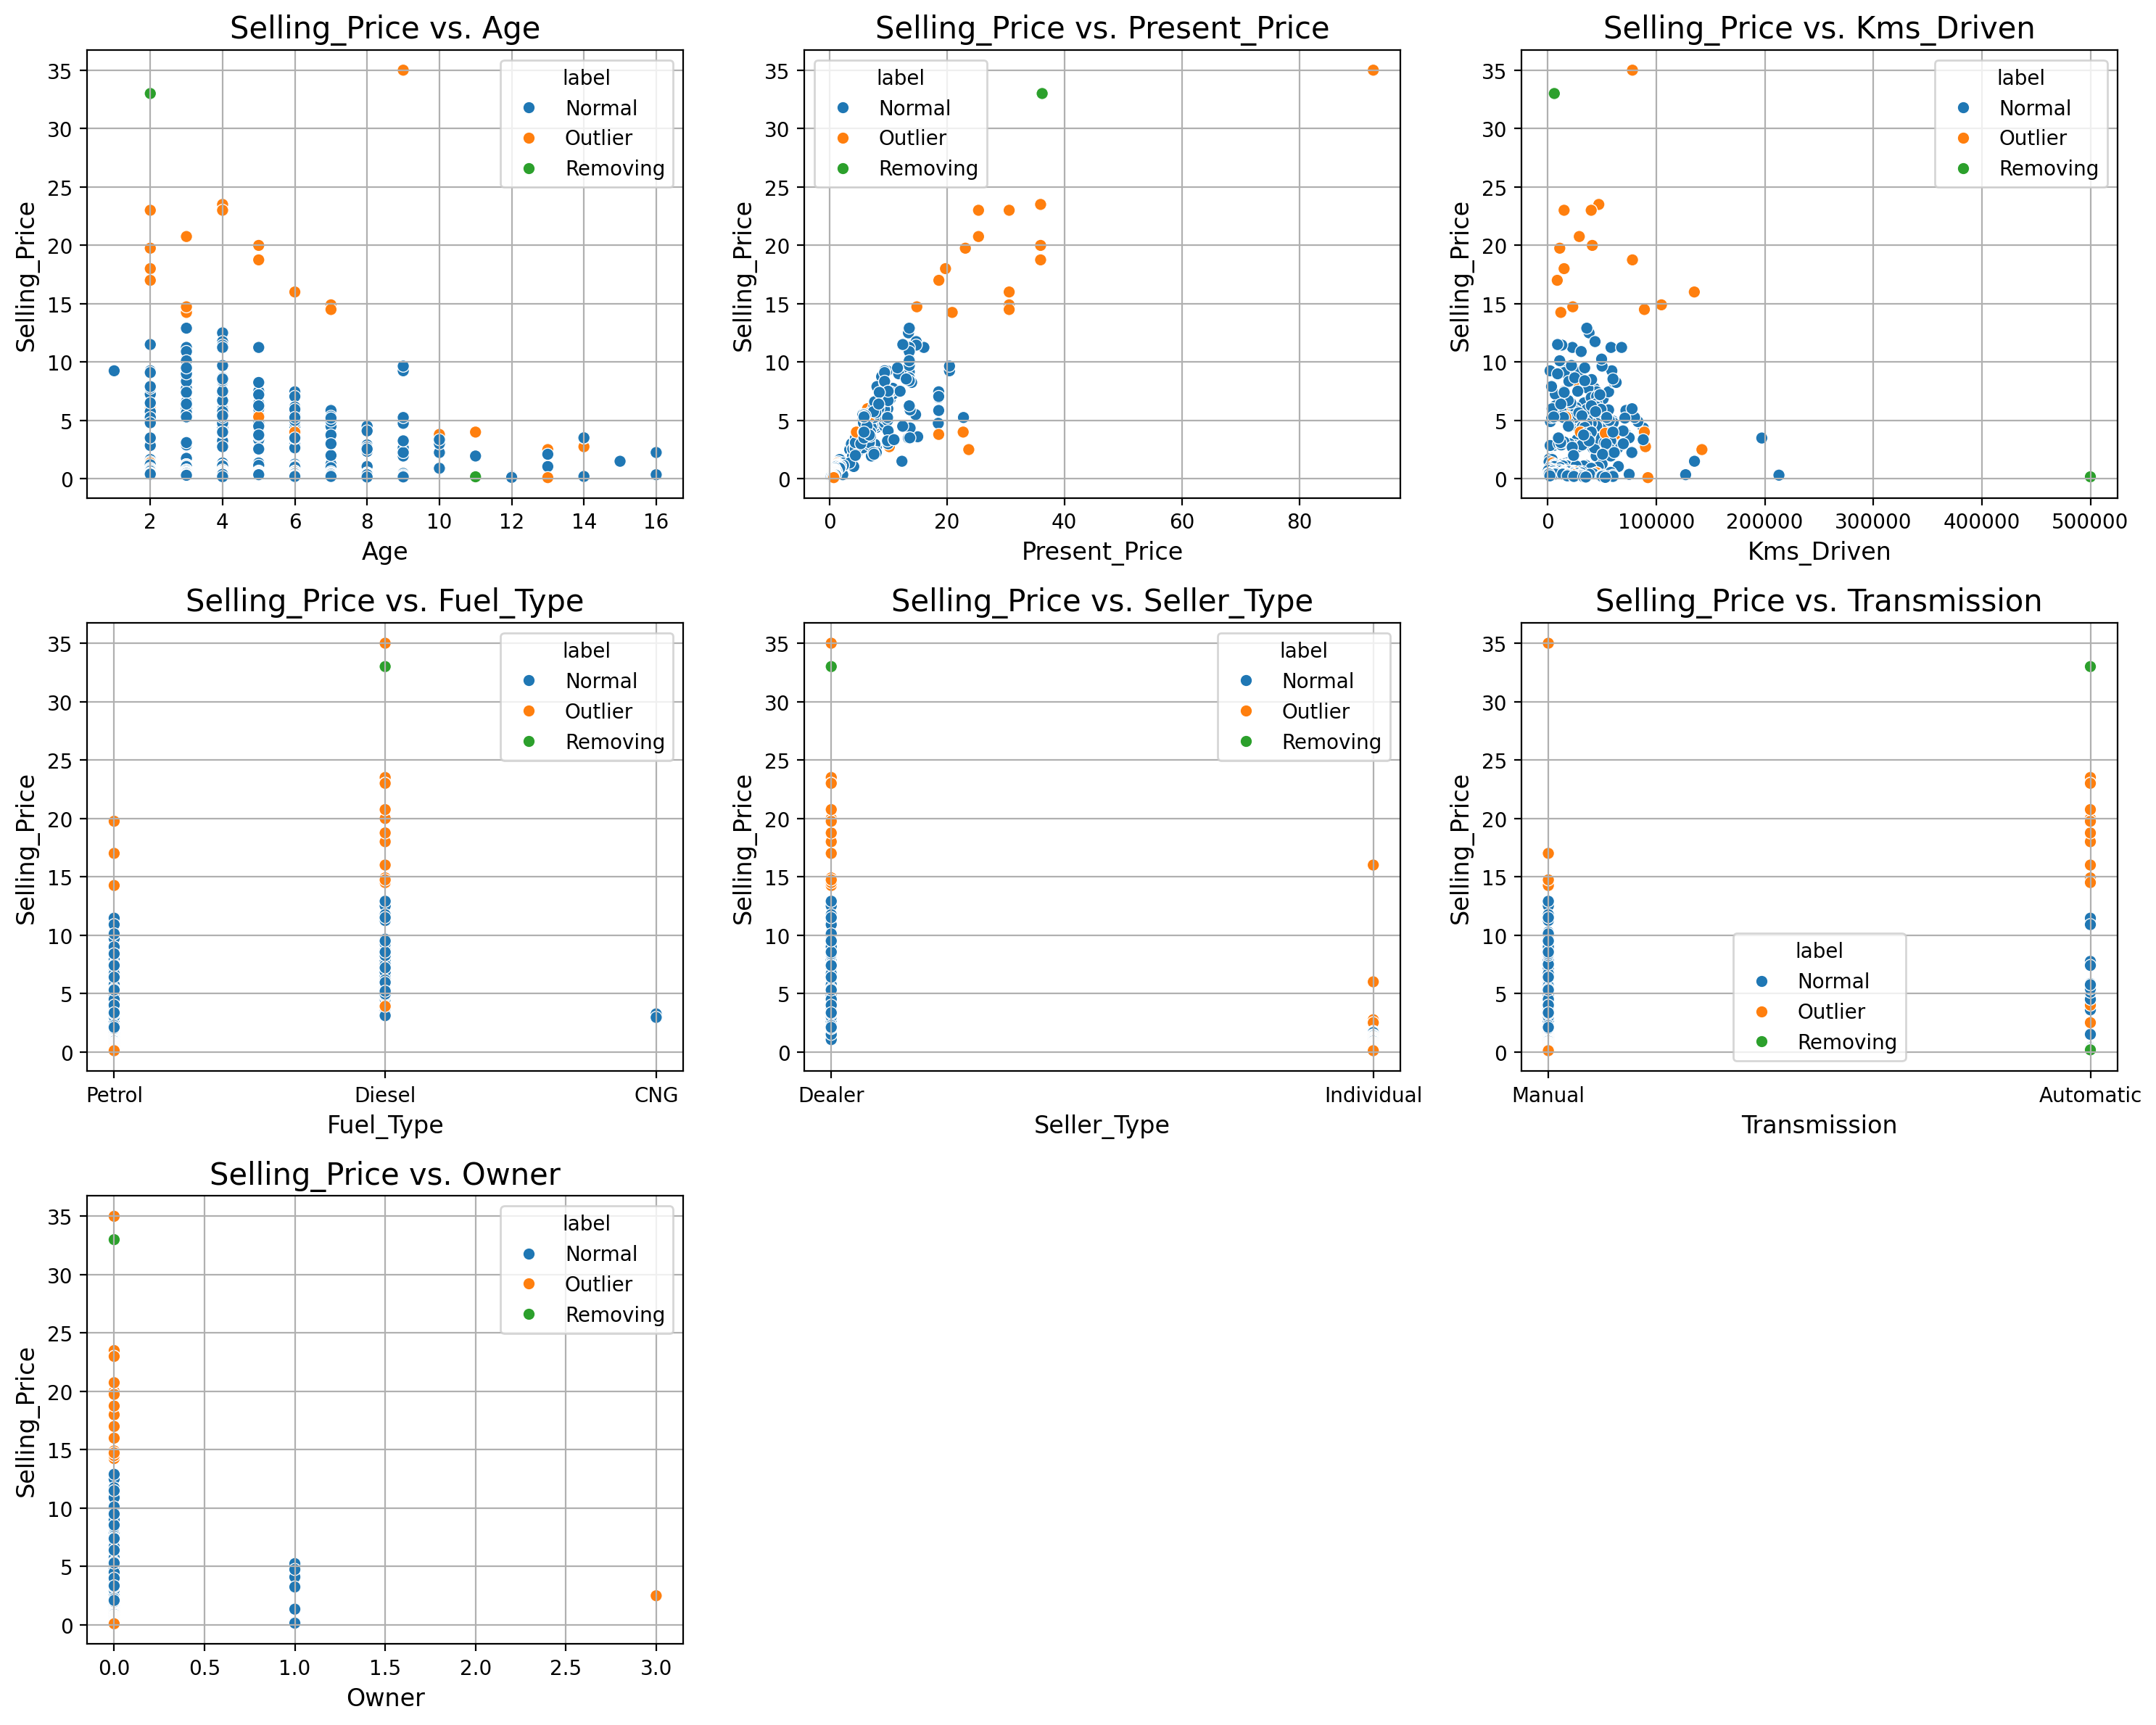

In [103]:
df1 = df.copy()
df1['label'] = 'Normal'
df1.loc[outlier_indexes, 'label'] = 'Outlier'
removing_indexes = []
removing_indexes.extend(df1[df1[target] == 33].index)
removing_indexes.extend(df1[df1['Kms_Driven'] > 400000].index)
df1.loc[removing_indexes, 'label'] = 'Removing'
features = df.columns.drop(target)
fig, ax = plt.subplots(nrows=3 ,ncols=3, figsize=(15,12), dpi=200)
for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=df1, x=features[i], y=target, hue='label', ax=ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

ax[2, 1].axis('off')
ax[2, 2].axis('off')
plt.tight_layout()
plt.show()

In [104]:
df1 = df.copy()
removing_indexes=list(set(removing_indexes))
removing_indexes

[64, 196]

In [105]:
df1.drop(removing_indexes, inplace=True)
df1.reset_index(drop=True, inplace=True)

In [106]:
df1 = pd.get_dummies(df1, drop_first=True,dtype=int,)

In [107]:
df1.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,0,1,0,1
1,6,4.75,9.54,43000,0,1,0,0,1
2,2,7.25,9.85,6900,0,0,1,0,1
3,8,2.85,4.15,5200,0,0,1,0,1
4,5,4.60,6.87,42450,0,1,0,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

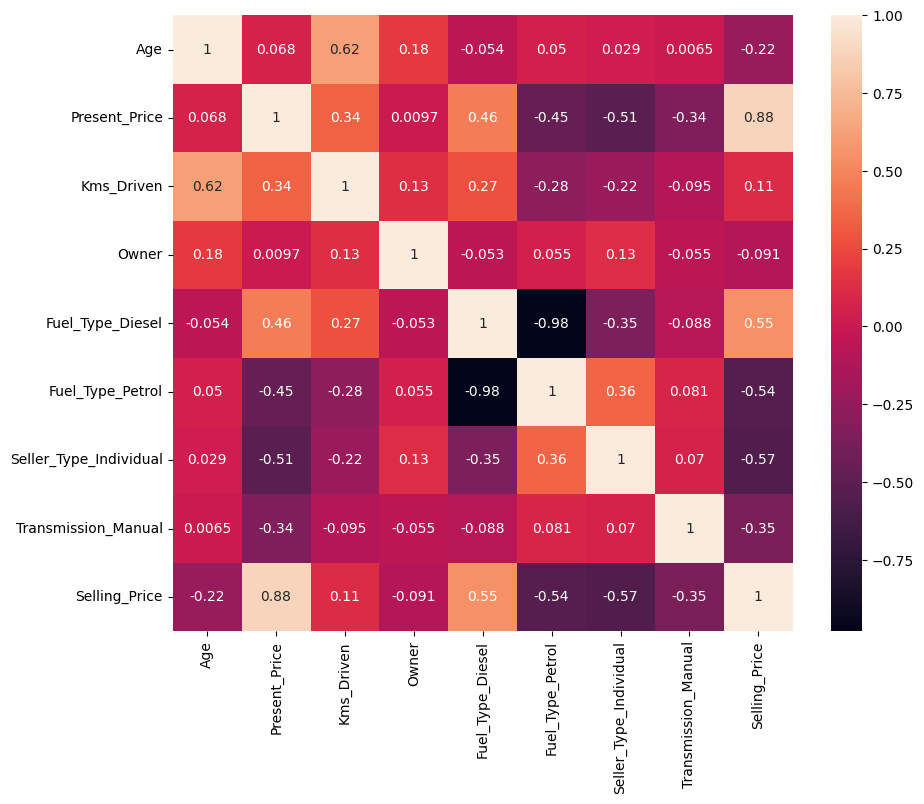

In [109]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(pd.concat([df1.drop(target,axis=1), df1[target]],axis=1).corr(), annot=True)
plt.show

In [141]:
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold

In [112]:
x = df1.drop(target,axis=1)
y = df1[target]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
y_test_actual = y_test.copy()
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [114]:
Liner_reg= LinearRegression()
Liner_reg.fit(X_train,y_train)

LinearRegression()

In [127]:
def model_evaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = r2_score(y_test, y_pred)
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'],columns=[type(model).__name__])

In [128]:
model_evaluation(Liner_reg, X_test, y_test)

,LinearRegression
MAE,1.099766
MSE,2.880819
RMSE,1.697297
R2-Score,0.888096


In [145]:
Liner_reg_CV= LinearRegression()
scaler = StandardScaler()
pipeline = make_pipeline(scaler, Liner_reg_CV)
kf = KFold(n_splits=6, shuffle=True, random_state=0)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
results = cross_validate(pipeline, x, y, cv=kf, return_train_score=True, scoring=scoring)
MAE_mean = (-results['test_neg_mean_absolute_error']).mean()
MSE_mean = (-results['test_neg_mean_squared_error']).mean()
RMSE_mean = (-results['test_neg_root_mean_squared_error']).mean()
R2_mean = results['test_r2'].mean()
MAE_std = (-results['test_neg_mean_absolute_error']).std()
MSE_std = (-results['test_neg_mean_squared_error']).std()
RMSE_std = (-results['test_neg_root_mean_squared_error']).std()
R2_std = results['test_r2'].std()
pd.DataFrame({'Mean':[MAE_mean, MSE_mean, RMSE_mean, R2_mean],'Std':[MAE_std,MSE_std,RMSE_std,R2_std]}, index=['MAE', 'MSE', 'RMSE' ,'R2-Score'])

,Mean,Std
MAE,1.147898,0.152310
MSE,3.364161,1.808595
RMSE,1.780583,0.440097
R2-Score,0.847520,0.039213


In [146]:
def residual(model,X_test, y_test):
    y_pred = model.predict(X_test)
    df_results = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    df_results['Residual'] = df_results['Actual'] - df_results['Predicted']
    return df_results

In [157]:
def linear_assumptions(model, X_test, y_test):
    df_results = residual(model, X_test, y_test)
    f,ax = plt.subplots(1,2, figsize=(12, 8))
    sns.regplot(x='Predicted', y='Actual', data=df_results, ax=ax[0],color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[0].set_title('Actual vs. Predicted Values', fontsize=15)
    ax[0].set_xlabel('Predicted', fontsize=12)
    ax[0].set_ylabel('Actual', fontsize=12)
    sns.regplot(x='Predicted', y='Residual', data=df_results, ax=ax[1],color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[1].set_title('Predicted vs. Residual', fontsize=15)
    ax[1].set_xlabel('Predicted', fontsize=12)
    ax[1].set_ylabel('Residual', fontsize=12)

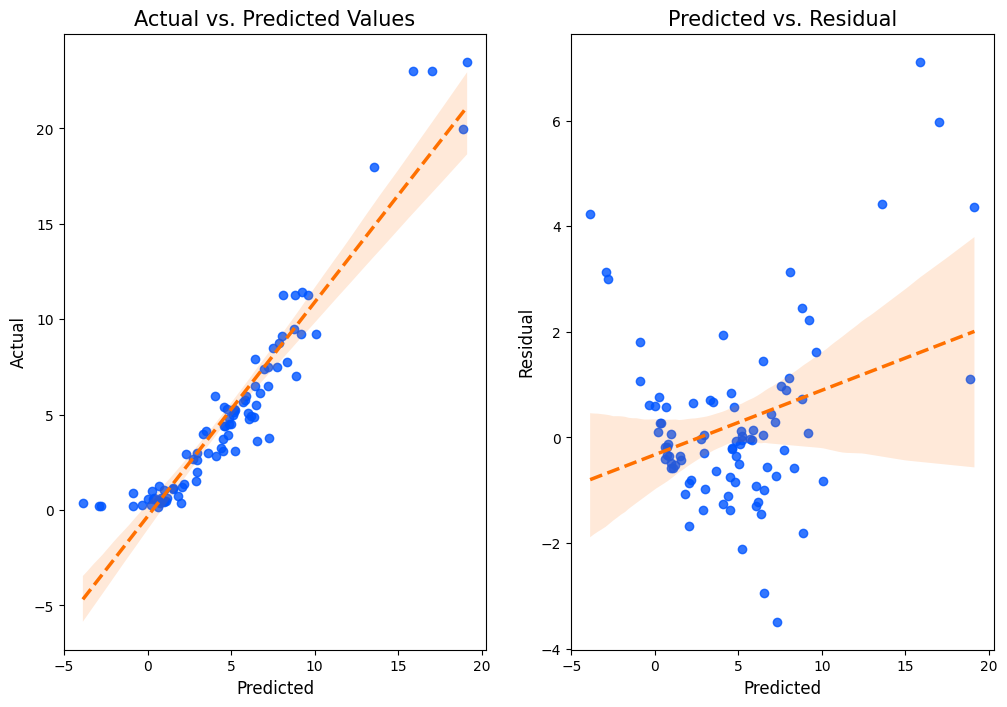

In [158]:
linear_assumptions(Liner_reg, X_test, y_test)